# Fishyscapes Anomaly Detection Benchmark

Fishyscapes is a benchmark for anomaly detection in semantic segmentation. The benchmark is available as part of the **Bayesian Deep Learning Benchmarks** (BDL Benchmarks or `bdlb` for short). BDL Benchmarks is an open-source framework that aims to bridge the gap between the design of deep probabilistic machine learning models and their application to real-world problems, hosted on [GitHub](https://github.com/OATML/bdl-benchmarks).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hermannsblum/bdl-benchmark/blob/master/notebooks/fishyscapes.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/hermannsblum/bdl-benchmark/blob/master/notebooks/fishyscapes.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [12]:
#@title Dependencies & Prerequisites
!pip3 install --quiet tensorflow-gpu
!pip3 install --quiet --upgrade git+https://github.com/hermannsblum/bdl-benchmark.git

In [5]:
#@title Imports and Setup
import bdlb
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def visualize_tfdataset(tfdataset, num_samples):
  """Visualizes `num_samples` from the `tfdataset`."""
  
  fig, axs = plt.subplots(num_samples, 2, figsize=(7, 2*num_samples))
  for i, blob in enumerate(tfdataset.take(num_samples)):
    image = blob['image_left'].numpy()
    mask = blob['mask'].numpy()
    axs[i][0].imshow(image.astype('int'))
    axs[i][0].axis("off")
    axs[i][0].set(title="Image")
    # map 255 to 2 such that difference between labels is better visible
    mask[mask == 255] = 2
    axs[i][1].imshow(mask[..., 0])
    axs[i][1].axis("off")
    axs[i][1].set(title="Mask")
  fig.show()

In [2]:
fs = bdlb.load(benchmark="fishyscapes", download_and_prepare=False)
fs.download_and_prepare('LostAndFound')

2022-05-01 10:46:26.579715: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Extraction completed...: 100%|██████████| 2/2 [01:34<00:00, 47.27s/ file]
                                                                        

Dataset fishyscapes downloaded and prepared to /home/codespace/tensorflow_datasets/fishyscapes/LostAndFound/1.0.0. Subsequent calls will reuse this data.


## Accessing and Visualizing the Dataset

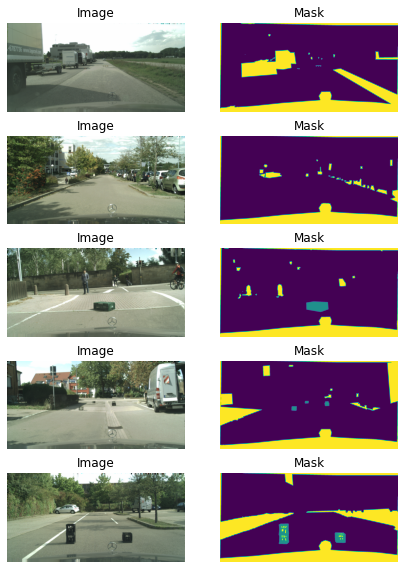

In [9]:
# load the dataset, there is only a validation dataset
ds = tfds.load('fishyscapes/LostAndFound', split='validation')
visualize_tfdataset(ds, 5)

There are 3 different labels in the Fishyscapes Lost & Found dataset:  
- anomaly (any anomalous object)
- in-distribution (any object or background class that fits into one of the definitions of the [cityscapes classes](https://www.cityscapes-dataset.com/dataset-overview/#labeling-policy))
- void (does not exactly fit to cityscapes classes, but could still be found in cityscapes training images, most often labelled also as void there).

The images were labelled to strictly satisfy the definitions of the first two classes. Applying a coarse labelling that means that some pixels that are labelled void can also belong to the first two classes. In evaluation, we ignore all pixels that are labelled as void.

## Evaluate your Method

100%|██████████| 2/2 [00:00<00:00,  5.20it/s]


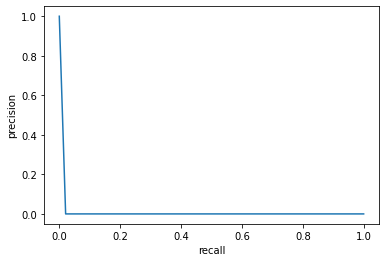

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

def estimator(image):
    """Assigns a random uncertainty per pixel."""
    uncertainty = tf.random.uniform(image.shape[:-1])
    return uncertainty

fs = bdlb.load(benchmark="fishyscapes", download_and_prepare=False)
metrics = fs.evaluate(estimator, ds.take(2))

plt.plot(metrics['recall'], metrics['precision'])
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()